In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**In this exercise you should implement everything including the tests (e.g. the chi-square and KS tests) yourself. Later, when your code is working you are free to use builtin functions.**

**1. Write a program implementing a linear congruential generator (LCG). Be sure that the program works correctly using only integer representation.**

In [2]:
def seedLCG(initVal):
    global rand
    rand = initVal

def lcg():
    a = 1140671485
    c = 128201163
    m = 2**24
    global rand
    rand = (a*rand + c) % m
    return rand / m

seedLCG(1)

In [3]:
for i in range(5):
    print(lcg())

0.6307034492492676
0.6911689639091492
0.0895453691482544
0.8425973057746887
0.6763980388641357


**(a) Generate 10.000 (pseudo-) random numbers and present these numbers in a histogramme (e.g. 10 classes).**

(array([1019.,  975., 1025., 1022.,  972.,  979.,  989., 1002., 1034.,
         983.]),
 array([4.38690186e-05, 1.00035852e-01, 2.00027835e-01, 3.00019819e-01,
        4.00011802e-01, 5.00003785e-01, 5.99995768e-01, 6.99987751e-01,
        7.99979734e-01, 8.99971718e-01, 9.99963701e-01]),
 <BarContainer object of 10 artists>)

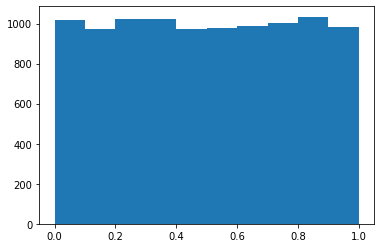

In [4]:
nums = []
for i in range(10000):
    nums.append(lcg())

# histogram
plt.hist(nums, bins=10)

**(b) Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests - χ2, Kolmogorov-Smirnov, run-tests, and correlation test.**

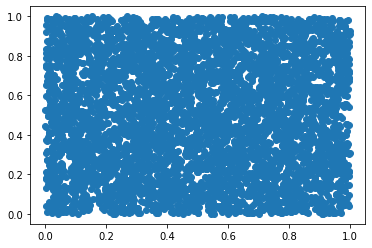

In [5]:
# scatter plot
plt.scatter(nums[:5000], nums[5000:])

The generated numbers look quite sparse and they cover almost all the 2D grid.

In [6]:
# chi-square test
bin_edges = np.histogram(nums, bins=10)
cumsum = 0.0
for i in range(len(bin_edges[0])):
    cumsum += np.power((bin_edges[0][i] - 1000), 2) / 1000
print(f'Chi-square computed value: {cumsum}')
df = len(bin_edges[0]) - 1 # degrees of freedom
chi2 = 5.9 # 9 degrees of freedom and 75% confidence
if cumsum < chi2:
    print('H0 is accepted (chi2[9,0.75] = 5.9)')
else:
    print('H0 is rejected')

Chi-square computed value: 4.889999999999999
H0 is accepted (chi2[9,0.75] = 5.9)


The generator passes the Chi-Square test for 9 degrees of freedom and 75% confidence.

In [7]:
# Kolmogorv-Smirnov test
K_plus =[]
K_minus =[]
x = np.array(nums)

# sort the random numbers
x = np.sort(x)
n = len(nums)

# calculate (xj - (j-1)/n)
for j in range(1, n+1):
    term = x[j-1] - ((j-1)/n)
    K_minus.append(term)

# calculate (j/n - xj)
for j in range(1, n+1):
	term = (j/n) - x[j-1]
	K_plus.append(term)

# calculate (K+, K-)
result = (int(np.sqrt(n))*max(K_minus), int(np.sqrt(n))*max(K_plus))
print("Value of (K+, K-) is:")
print(result)

# compare it with the theoric values
ls = 1.94947 / np.sqrt(n) # value ks[+50,0.01] from table
if result[0] < ls:
    print('H0 is accepted (ks[+50,0.01])')
else:
    print('H0 is rejected (ks[+50,0.01])')

Value of (K+, K-) is:
(0.26448457717895835, 0.6035928630828857)
H0 is rejected (ks[+50,0.01])


The LCG is not passing the Kolmogorov-Smirnov test, the hipothesis is being refused for a confidence of 1% and over 50 samples. This test is more suitable for a low number of samples, meanwhile chi-square is better when the number of samples is bigger.

In [8]:
# Test I: above/below the mean
mu = 0.5
n1 = 0
n2 = 0
for i in nums:
    if i > mu:
        n1 += 1
    else:
        n2 += 1
print(f'n1={n1} n2={n2}')

n1=4987 n2=5013


As expected, approx. half of the examples are located above the mean and the rest are located below.

In [9]:
# Test II: up/down from Knuth
n = len(nums)
R = []
i = 0
while i<n:
    length = 1
    next_idx = i + length
    if next_idx >= n:
        R.append(length)
        break
    while nums[next_idx] > nums[next_idx-1]:
        length += 1
        next_idx = i + length
        if next_idx >= n:
            break
    R.append(length)
    i = i+length

A = np.matrix('4529.4 9044.9 13568 18091 22615 27892; 9044.9 18097 27139 36187 45234 55789; 13568 27139 40721 54281 67852 83685; 18091 36187 54281 72414 90470 111580; 22615 45234 67852 90470 113262 139476; 27892 55789 83685 111580 139476 172860')
B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])[np.newaxis]
R = np.array([R.count(1), R.count(2), R.count(3), R.count(4), R.count(5), R.count(6)+R.count(7)])[np.newaxis]
Z = (1/(n-6)) * (R-n*B) * (A*(R-n*B).T)
print(f'Z = {Z}')

# compare it with the theoric values
chi2 = 2.204 # 6 degrees of freedom and 90% confidence
if Z < chi2:
    print('H0 is accepted (chi2[6,0.9] = 2.204)')
else:
    print('H0 is rejected')

Z = [[2.08904649]]
H0 is accepted (chi2[6,0.9] = 2.204)


With the current values, the hipothesis of a uniform distribution is accepted with a confidence of 90% and 6 degrees of freedom.

In [10]:
# Test III: the-Up-and-Down test
n = len(nums)
R = []
i = 0
while i<n:
    length = 1
    next_idx = i + length
    if next_idx >= n:
        R.append(length)
        break
    if nums[next_idx] > nums[next_idx-1]:
        while nums[next_idx] > nums[next_idx-1]:
            length += 1
            next_idx = i + length
            if next_idx >= n:
                break
    else:
        while nums[next_idx] < nums[next_idx-1]:
            length += 1
            next_idx = i + length
            if next_idx >= n:
                break
    R.append(length)
    i = i+length

X = len(R)
Z = (X-((2*n-1)/3)) / np.sqrt((16*n-29)/90)
print(f'Z = {Z}')
#???

Z = -60.20731749086359


There's some mistake in with this implementation, the result of this test should be close to 0.

In [11]:
# Correlation coefficients
n = len(nums)
h = 10
cumsum = 0.0
for i in range(n-h):
    cumsum += nums[i]*nums[i+h]
ch = cumsum / (n-h)
print(f'Ch = {ch}')

Ch = 0.24811373023081879


The result should be distributed as N(0.25, 7/144n). Since the result is 0.24 we consider the generator is also passing this test.

**(c) Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice.**

(array([1003., 1066., 1009.,  976.,  983.,  954., 1035., 1023.,  953.,
         998.]),
 array([1.84338342e-05, 1.00002540e-01, 1.99986646e-01, 2.99970752e-01,
        3.99954858e-01, 4.99938964e-01, 5.99923070e-01, 6.99907176e-01,
        7.99891282e-01, 8.99875388e-01, 9.99859494e-01]),
 <BarContainer object of 10 artists>)

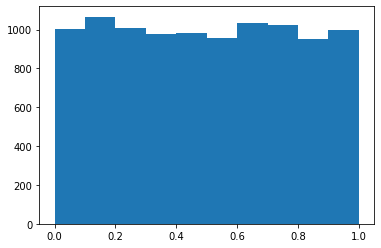

In [12]:
def seedLCG(initVal):
    global rand
    rand = initVal

def lcg():
    a = 6364136223846793005
    c = 1
    m = 2**64
    global rand
    rand = (a*rand + c) % m
    return rand / m

seedLCG(1)

nums = []
for i in range(10000):
    nums.append(lcg())

# histogram
plt.hist(nums, bins=10)

In [13]:
# chi-square test
bin_edges = np.histogram(nums, bins=10)
cumsum = 0.0
for i in range(len(bin_edges[0])):
    cumsum += np.power((bin_edges[0][i] - 1000), 2) / 1000
print(f'Chi-square computed value: {cumsum}')
df = len(bin_edges[0]) - 1 # degrees of freedom
chi2 = 5.9 # 9 degrees of freedom and 75% confidence
if cumsum < chi2:
    print('H0 is accepted (chi2[9,0.75] = 5.9)')
else:
    print('H0 is rejected')

Chi-square computed value: 11.393999999999998
H0 is rejected


With values a=6364136223846793005, c=1 and m=2**64, the LCG doesn't pass the chi-squeare test for 9 degrees of freedom and 75% confidence. This would be a worse version of the LCG.

(array([1007.,  996., 1004., 1008.,  992., 1001.,  982.,  999., 1001.,
        1010.]),
 array([2.40188308e-04, 1.00187347e-01, 2.00134505e-01, 3.00081664e-01,
        4.00028823e-01, 4.99975981e-01, 5.99923140e-01, 6.99870298e-01,
        7.99817457e-01, 8.99764615e-01, 9.99711774e-01]),
 <BarContainer object of 10 artists>)

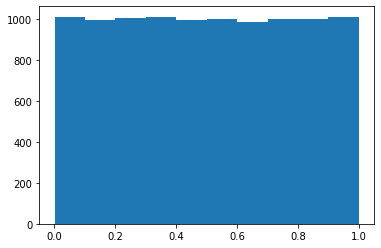

In [14]:
def seedLCG(initVal):
    global rand
    rand = initVal

def lcg():
    a = 26977
    c = 10516
    m = 20817
    global rand
    rand = (a*rand + c) % m
    return rand / m

seedLCG(20)

nums = []
for i in range(10000):
    nums.append(lcg())

# histogram
plt.hist(nums, bins=10)

In [15]:
# chi-square test
bin_edges = np.histogram(nums, bins=10)
cumsum = 0.0
for i in range(len(bin_edges[0])):
    cumsum += np.power((bin_edges[0][i] - 1000), 2) / 1000
print(f'Chi-square computed value: {cumsum}')
df = len(bin_edges[0]) - 1 # degrees of freedom
chi2 = 5.9 # 9 degrees of freedom and 75% confidence
if cumsum < chi2:
    print('H0 is accepted (chi2[9,0.75] = 5.9)')
else:
    print('H0 is rejected')

Chi-square computed value: 0.636
H0 is accepted (chi2[9,0.75] = 5.9)


With a=26977, c=10516 and m=20817 (values proposed in the paper https://dl.acm.org/doi/pdf/10.5555/2955239.2955463) we reach a very optimal value from the chi-square test: 0.636. An improvement of more than 4 points for the same test with the original values. This would be an optimal LCG.

**2. Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too.**

(array([ 999., 1066.,  963., 1046.,  960.,  994., 1023.,  970.,  998.,
         981.]),
 array([1.03363094e-04, 1.00091815e-01, 2.00080266e-01, 3.00068717e-01,
        4.00057169e-01, 5.00045620e-01, 6.00034072e-01, 7.00022523e-01,
        8.00010975e-01, 8.99999426e-01, 9.99987878e-01]),
 <BarContainer object of 10 artists>)

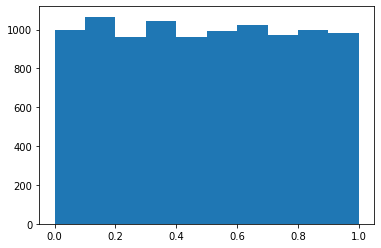

In [16]:
nums = np.random.uniform(size=10000)

# histogram
plt.hist(nums, bins=10)

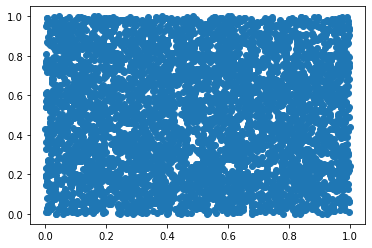

In [17]:
# scatter plot
plt.scatter(nums[:5000], nums[5000:])

In [18]:
# chi-square test
bin_edges = np.histogram(nums, bins=10)
cumsum = 0.0
for i in range(len(bin_edges[0])):
    cumsum += np.power((bin_edges[0][i] - 1000), 2) / 1000
print(f'Chi-square computed value: {cumsum}')
df = len(bin_edges[0]) - 1 # degrees of freedom
chi2 = 5.9 # 9 degrees of freedom and 75% confidence
if cumsum < chi2:
    print('H0 is accepted (chi2[9,0.75] = 5.9)')
else:
    print('H0 is rejected')

Chi-square computed value: 11.272
H0 is rejected


In [19]:
# Kolmogorv-Smirnov test
K_plus =[]
K_minus =[]
x = np.array(nums)

# sort the random numbers
x = np.sort(x)
n = len(nums)

# calculate (xj - (j-1)/n)
for j in range(1, n+1):
    term = x[j-1] - ((j-1)/n)
    K_minus.append(term)

# calculate (j/n - xj)
for j in range(1, n+1):
	term = (j/n) - x[j-1]
	K_plus.append(term)

# calculate (K+, K-)
result = (int(np.sqrt(n))*max(K_minus), int(np.sqrt(n))*max(K_plus))
print("Value of (K+, K-) is:")
print(result)

# compare it with the theoric values
ls = 1.94947 / np.sqrt(n) # value ks[+50,0.01] from table
if result[0] < ls:
    print('H0 is accepted (ks[+50,0.01])')
else:
    print('H0 is rejected (ks[+50,0.01])')

Value of (K+, K-) is:
(0.20037563541779602, 0.8246806246556104)
H0 is rejected (ks[+50,0.01])


In [20]:
# Test I: above/below the mean
mu = 0.5
n1 = 0
n2 = 0
for i in nums:
    if i > mu:
        n1 += 1
    else:
        n2 += 1
print(f'n1={n1} n2={n2}')

n1=4967 n2=5033


In [21]:
# Test II: up/down from Knuth
n = len(nums)
R = []
i = 0
while i<n:
    length = 1
    next_idx = i + length
    if next_idx >= n:
        R.append(length)
        break
    while nums[next_idx] > nums[next_idx-1]:
        length += 1
        next_idx = i + length
        if next_idx >= n:
            break
    R.append(length)
    i = i+length

A = np.matrix('4529.4 9044.9 13568 18091 22615 27892; 9044.9 18097 27139 36187 45234 55789; 13568 27139 40721 54281 67852 83685; 18091 36187 54281 72414 90470 111580; 22615 45234 67852 90470 113262 139476; 27892 55789 83685 111580 139476 172860')
B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])[np.newaxis]
R = np.array([R.count(1), R.count(2), R.count(3), R.count(4), R.count(5), R.count(6)+R.count(7)])[np.newaxis]
Z = (1/(n-6)) * (R-n*B) * (A*(R-n*B).T)
print(f'Z = {Z}')

# compare it with the theoric values
chi2 = 2.204 # 6 degrees of freedom and 90% confidence
if Z < chi2:
    print('H0 is accepted (chi2[6,0.9] = 2.204)')
else:
    print('H0 is rejected')

Z = [[2.98138571]]
H0 is rejected


In [22]:
# Correlation coefficients
n = len(nums)
h = 10
cumsum = 0.0
for i in range(n-h):
    cumsum += nums[i]*nums[i+h]
ch = cumsum / (n-h)
print(f'Ch = {ch}')

Ch = 0.24737190613335108


The implementation from NumPy seems to be less close to the uniform distribution than the first one tested in this notebook and the optimal one proposed.